# <p style="background-color: #b30024; font-family: Blippo, fantasy; line-height: 1.3; font-size: 26px; letter-spacing: 3px; text-align: center; color: #ffeef1"> Análisis FIFA 2018 - Clustering Reduced Dataset </p>

![](https://s.yimg.com/ny/api/res/1.2/sybAk0uKKJIlkVhfz5Jtuw--/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/http://media.zenfs.com/en-GB/homerun/uk.goal.com/42bf6d3fd31612f17e7b59c6260595db)


In [1]:
import numpy as np
import pandas as pd
import os 
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import re#, wget, os

In [2]:
df = pd.read_csv('fifa2018_data.csv')
df['PrefPos'].value_counts()

CB     1903
GK     1760
ST     1499
LB      649
CM      624
RB      549
RM      244
LM      213
RW       76
LW       60
CF       10
Name: PrefPos, dtype: int64

In [3]:
del df['Unnamed: 0']
df['PrefPos'] = df['PrefPos'].str.strip()
df = df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')]
df = df.reset_index(drop=True)
df['PrefPos'].value_counts()

X=df.iloc[:,0:38:1]
X=X.drop(['Wage'], axis=1)
X.head()

,Age,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision
0,30,92,92,2291,88,78,86,60,91,83,...,92,93,83,87,38,77,89,45,80,84
1,31,92,92,1493,58,29,52,35,48,70,...,12,85,55,25,11,61,44,10,83,70
2,26,90,92,1458,57,38,60,43,42,64,...,12,88,50,31,13,58,40,21,64,68
3,28,91,91,2143,79,80,78,80,89,87,...,91,91,83,88,19,83,79,42,84,78
4,28,88,88,2038,62,66,64,58,77,91,...,56,85,80,71,90,65,66,92,85,79


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
attributes_n=scaler.fit_transform(X)

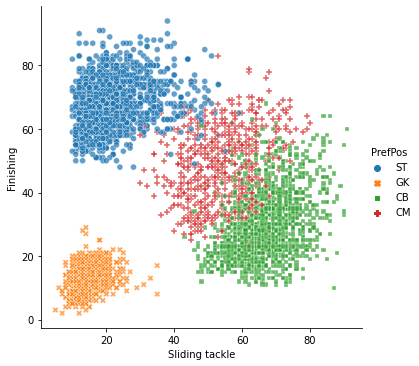

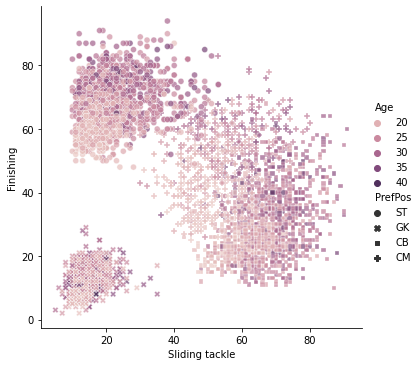

In [5]:
#Visualising the data for 3 specialised positions

import seaborn as sns


g = sns.relplot(x="Sliding tackle", 
                y="Finishing", 
                hue="PrefPos", 
                kind="scatter", 
                style = 'PrefPos',
                data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)

g = sns.relplot(x="Sliding tackle", 
                y="Finishing", 
                hue="Age", 
                kind="scatter", 
                style = 'PrefPos',
                data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)



In [6]:


from sklearn.decomposition import PCA
dim_reduce = PCA() #dim reduction
dim_reduce_fit = dim_reduce.fit_transform(X) 

explained_variance=dim_reduce.explained_variance_ratio_
cum_var_exp = np.cumsum(explained_variance) # Cumulative explained variance
print(list(zip(range(34),cum_var_exp)))


[(0, 0.9436294508584454), (1, 0.9672009510470321), (2, 0.981897300545989), (3, 0.9854799645171518), (4, 0.9882122200731784), (5, 0.9893306387272026), (6, 0.9903682146216289), (7, 0.9912322226532924), (8, 0.9919461565136092), (9, 0.9926334075438265), (10, 0.9932961298807256), (11, 0.9938913400129687), (12, 0.9944401568570349), (13, 0.9949614542678558), (14, 0.9954566594502195), (15, 0.9959239038735693), (16, 0.9963393474863931), (17, 0.9967289227612826), (18, 0.9970655168442013), (19, 0.9973798707158875), (20, 0.9976892742047234), (21, 0.9979727715096032), (22, 0.998224920652119), (23, 0.9984523281438306), (24, 0.9986656502164486), (25, 0.9988700029361037), (26, 0.9990673120474826), (27, 0.9992342080119623), (28, 0.99937779107326), (29, 0.9995141812678193), (30, 0.9996291449727773), (31, 0.9997243294869419), (32, 0.9998179730077744), (33, 0.999900491002172)]


In [7]:
xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]

df['xs']=xs
df['ys']=ys

In [8]:
from sklearn.cluster import KMeans
def dim_reduction(x):
    dim_reduce = PCA(n_components=15) #dim reduction
    dim_reduce_fit = dim_reduce.fit_transform(x) 
    return dim_reduce, dim_reduce_fit

dim_reduce, dim_reduce_fit = dim_reduction(X)


kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(dim_reduce_fit )


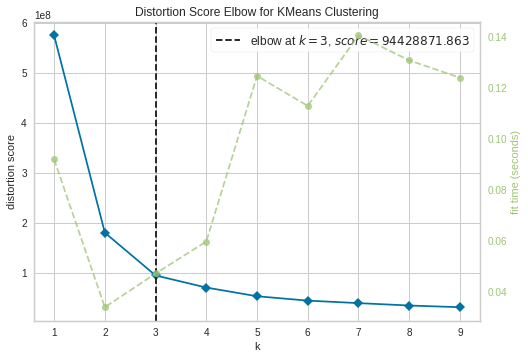

In [9]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
fig = KElbowVisualizer(model,k=(1,10))
fig.fit(dim_reduce_fit)
fig.show();

In [10]:
df['y_kmeans']=y_kmeans

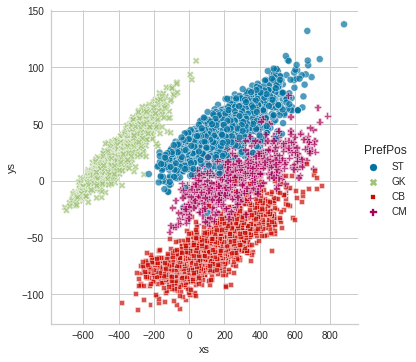

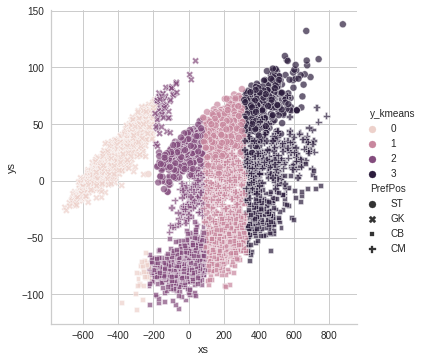

In [11]:
import seaborn as sns
xs = dim_reduce_fit[:,0]
ys = dim_reduce_fit[:,1]
df['xs']=xs
g = sns.relplot(x='xs', 
                y='ys', 
                hue="PrefPos", 
                kind="scatter", 
                style = 'PrefPos',
                data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)

g = sns.relplot(x='xs', 
                y='ys', 
                hue="y_kmeans", 
                kind="scatter", 
                style = 'PrefPos',
                data=df,#[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)


In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)
y_kmeans2 = kmeans.fit_predict(df[['Sliding tackle','Finishing']] )
df['y_kmeans2']=y_kmeans2

<Figure size 576x576 with 0 Axes>

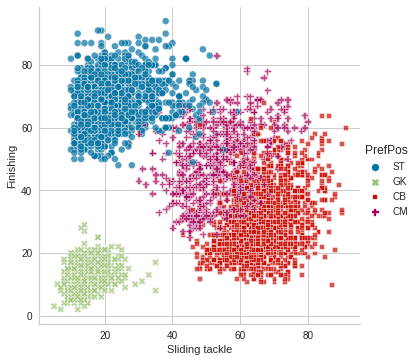

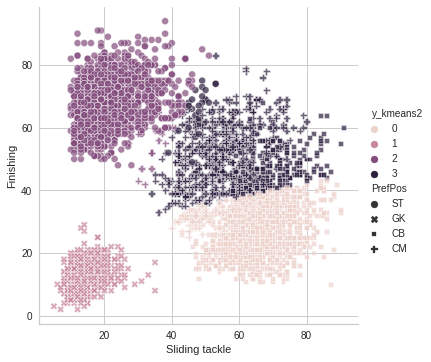

In [13]:
plt.figure(figsize=(8,8))

g = sns.relplot(x="Sliding tackle", 
                y="Finishing", 
                hue="PrefPos", 
                kind="scatter", 
                style = 'PrefPos',
                data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)

g = sns.relplot(x="Sliding tackle", 
                y="Finishing", 
                hue="y_kmeans2", 
                kind="scatter", 
                style = 'PrefPos',
                data=df[(df['PrefPos']=='CB') | (df['PrefPos']=='ST') | (df['PrefPos']=='GK') | (df['PrefPos']=='CM')], 
                alpha = 0.7)


In [14]:
# Filter the 'passing' & 'mentality_vision' features and check for missing values
df[['Sliding tackle', 'Finishing']].isnull().sum()

Sliding tackle    0
Finishing         0
dtype: int64

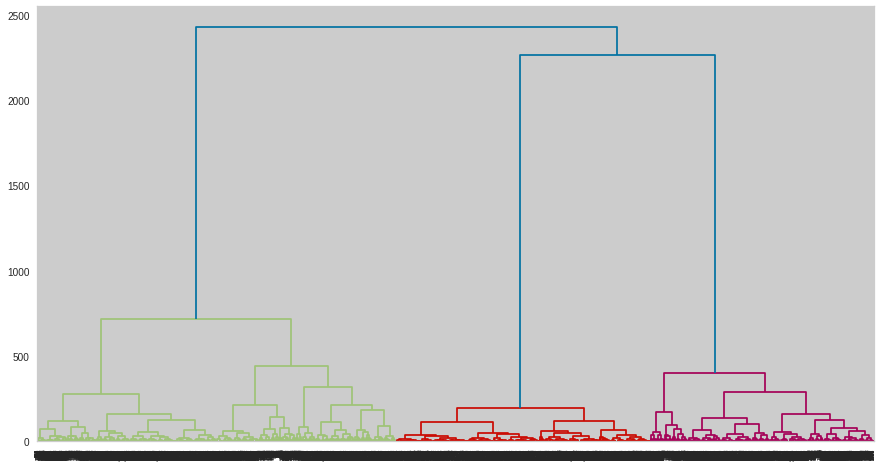

In [15]:
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')
# Fit the data into hierarchical clustering algorithm
dm = linkage(df[['Sliding tackle', 'Finishing']], method='ward')

# Create a dendrogram
plt.figure(figsize=(15,8))
dendr = dendrogram(dm)
plt.show()

In [16]:
# Assign cluster label to each row
df['labels'] = fcluster(dm, 4, criterion = 'maxclust')

In [17]:
 #Print cluster centers of each cluster
print(df.groupby('labels')['Sliding tackle', 'Finishing'].mean())

        Sliding tackle  Finishing
labels                           
1            65.021739  23.561997
2            62.058065  43.644355
3            14.161364  12.475000
4            22.665155  67.729922


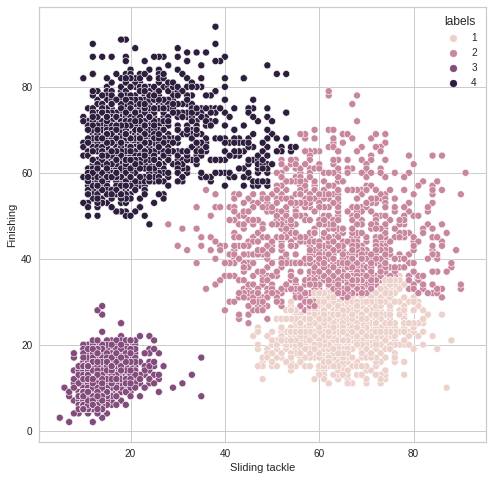

In [18]:
# Create the scatterplot
plt.figure(figsize=(8,8))
sns.scatterplot(x='Sliding tackle', y='Finishing', hue='labels', data=df)
plt.show()